1. Import libraries

In [2]:
import pandas as pd

2. Pre processe the data

In [3]:
data = pd.read_csv("../Data/raw_analyst_ratings.csv")

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Set 'date' as the index
data.set_index('date', inplace=True)

3. Resample by Year

In [3]:
# Resample by year and count the number of publications
annual_counts = data.resample('Y').size()

# Print the results
print(annual_counts)


/tmp/ipykernel_13540/3978062286.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_counts = data.resample('Y').size()


date
2011-12-31 00:00:00-04:00      760
2012-12-31 00:00:00-04:00     1187
2013-12-31 00:00:00-04:00     1240
2014-12-31 00:00:00-04:00     1189
2015-12-31 00:00:00-04:00     3695
2016-12-31 00:00:00-04:00     4223
2017-12-31 00:00:00-04:00     3581
2018-12-31 00:00:00-04:00     5395
2019-12-31 00:00:00-04:00     6325
2020-12-31 00:00:00-04:00    28392
dtype: int64


4. Visualize the Time Series Data

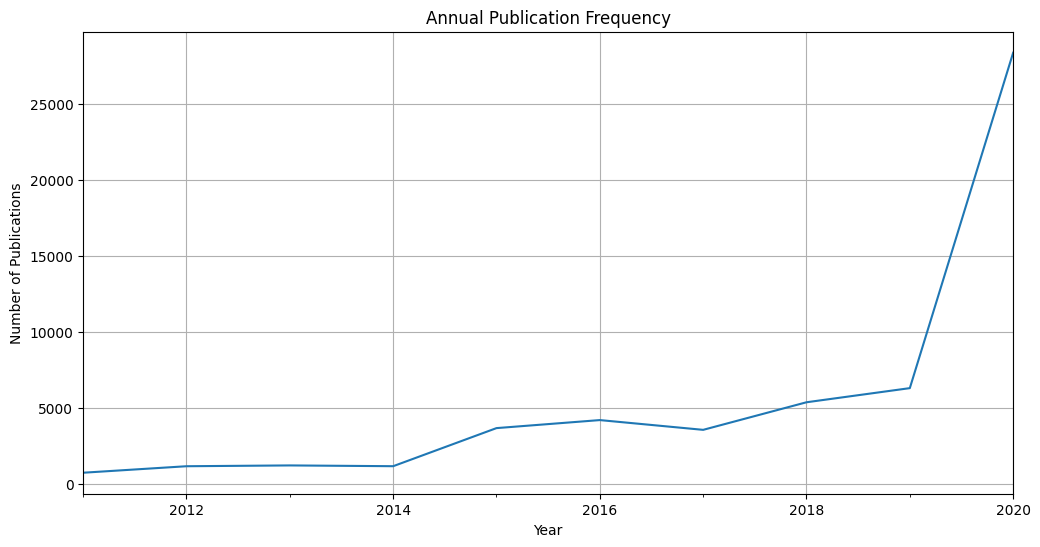

In [4]:
import matplotlib.pyplot as plt

# Plot annual publication counts
plt.figure(figsize=(12, 6))
annual_counts.plot()
plt.title('Annual Publication Frequency')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.show()


5. Identify Specific Time When Most NEWS Released

In [6]:
# Extract hour from datetime index
data['hour'] = data.index.hour

# Count the number of publications per hour
hourly_counts = data.groupby('hour').size()

# Print the results
print(hourly_counts)


hour
0.0       67
1.0       14
2.0       57
3.0       93
4.0     1469
5.0     1829
6.0     2476
7.0     5033
8.0     5527
9.0     5965
10.0    7669
11.0    5701
12.0    5732
13.0    2710
14.0    2075
15.0    1612
16.0    3939
17.0    2800
18.0     704
19.0     227
20.0     131
21.0      82
22.0      48
23.0      27
dtype: int64


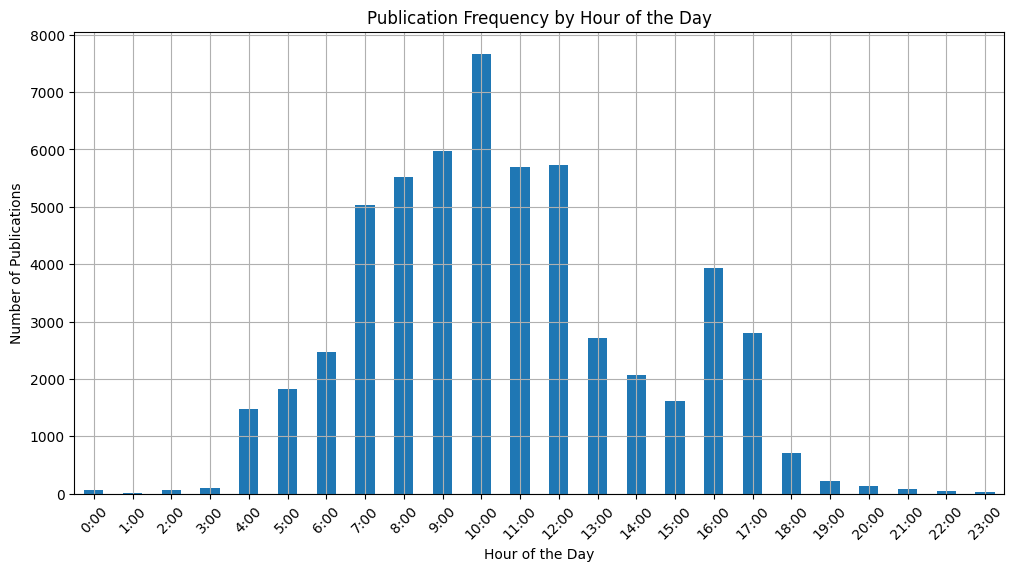

In [7]:
import matplotlib.pyplot as plt

# Plot hourly publication counts
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar')
plt.title('Publication Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.xticks(range(24), [f'{h}:00' for h in range(24)], rotation=45)
plt.show()
